<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 17: Distributions

Associated Textbook Sections: [10.1, 10.2, 10.3, and 10.4](https://ccsf-math-108.github.io/textbook/chapters/10/1/Empirical_Distributions.html)

---

## Outline

* [Distributions](#Distributions)
* [Law of Large Numbers](#Law-of-Large-Numbers)
* [A Statistic](#A-Statistic)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Distributions

---

### Probability Distribution

<a href="https://ccsf-math-108.github.io/textbook/chapters/10/1/Empirical_Distributions.html#a-probability-distribution"><img src="./probability_dist_die.png" alt="Probability distribution for the number shown on a single die roll."/></a>

* Random quantity with various possible values
* Probability Distribution:
    * All the possible values of the quantity
    * The probability of each of those values
* If you can do the math, you can work out the probability distribution without ever simulating it
* But... simulation is often easier!


---

### Empirical Distribution

<a href="https://ccsf-math-108.github.io/textbook/chapters/10/1/Empirical_Distributions.html#empirical-histograms"><img src="./empirical_dist_die_10.png" alt="An empirical distribution for the number shown on a die roll based on 10 observations."/></a>

* Empirical: based on observations
* Observations can be from repetitions of an experiment
* Empirical Distribution:
    * All observed values
    * The proportion of times each value appears

---

### Demo: Distributions

Create a table with the face numbers of a six-sided die. Use that table with the `sample` method to simulate randomly rolling a die. Visualize the probability distribution.

In [ ]:
die =Table().with_column('Face',np.arange(1,7))
die

Face
1
2
3
4
5
6


In [ ]:
die.sample(3)

Face
5
2
4


In [ ]:
...

In [ ]:
roll_bins = np.arange(0.5, 7.5)
...

---

Randomly sample using a few different sample sizes and visualize the resulting empirical distributions.

In [ ]:
...

In [ ]:
...

In [ ]:
...

---

## Law of Large Numbers

---

### Law of Averages / Law of Large Numbers

* If a chance experiment is repeated many times, independently and under the same conditions, then the proportion of times that an event occurs gets closer to the theoretical probability of the event
* As you increase the number of rolls of a six-sided die, the proportion of times you see the face with five spots gets closer to 1/6


---

### Empirical Distribution of a Sample

If the sample size is large, then the empirical distribution of a uniform random sample resembles the distribution of the population, with high probability.


---

### Demo: Large Random Samples

The following code loads the same SFO November 2023 flight delay data in `delays.csv` sourced from the [Bureau of Transportation Statistic's Reporting Carrier On-Time Performance Data](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr). Additionally, we filter out the rows with missing delay data.

In [ ]:
delays = Table.read_table('delays.csv')
sfo_delays = delays.where('ORIGIN', 'SFO').drop(0,2).relabeled('ARR_DELAY', 'DELAY')
nan_filter = np.invert(np.isnan(sfo_delays.column('DELAY')))
sfo_delays = sfo_delays.where(nan_filter)
sfo_delays

OP_CARRIER,DEST,DELAY
AA,CLT,-23
AA,CLT,-22
AA,CLT,-19
AA,CLT,-17
AA,CLT,-12
AA,DFW,-32
AA,DFW,-25
AA,DFW,-25
AA,DFW,-18
AA,DFW,-17


---

Visualize the empirical distribution of flight delays in the delay data. You'll need to adjust the bins. Take note of the average and median flight delays.

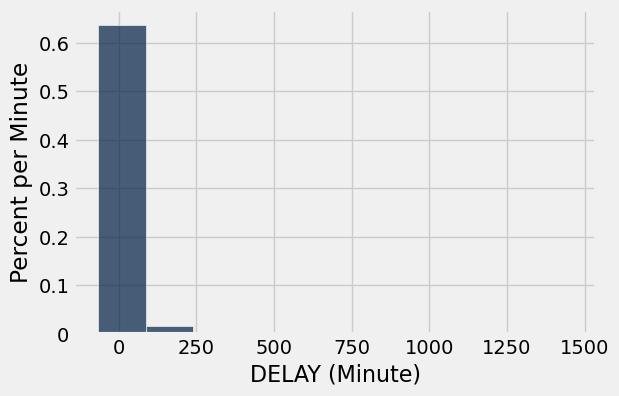

In [ ]:
sfo_delays.hist("DELAY",unit="Minute")

In [ ]:
min_delay = min(sfo_delays.column('DELAY'))
min_delay

-66.0

In [ ]:
max_delay = max(sfo_delays.column('DELAY'))
max_delay

1461.0

In [ ]:
# The percentile function will be introduced later in the course
percentile_99 = percentile(99, sfo_delays.column('DELAY'))
print(f'99% of the delays are most {percentile_99} mins.')

99% of the delays are most 151.0 mins.


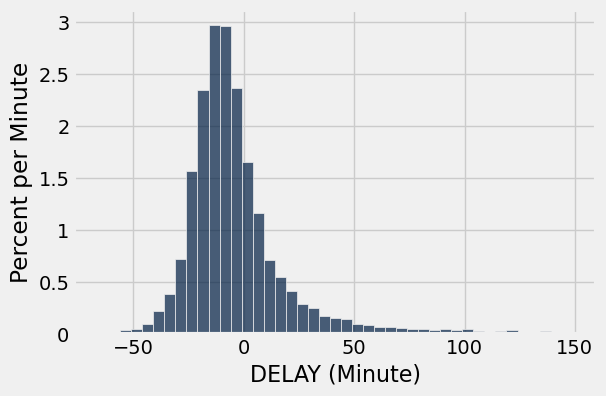

In [ ]:
bins = np.arange(min_delay, percentile_99, 5)
sfo_delays.hist("DELAY",bins=bins, unit="Minute")

In [ ]:
average_delay = np.average(sfo_delays.column('DELAY'))
average_delay

-0.69082428917391692

In [ ]:
median_delay = np.median(sfo_delays.column('DELAY'))
median_delay

-9.0

---

Randomly sample 10 and 1000 flights from the delay data and visualize the distributions of the samples.

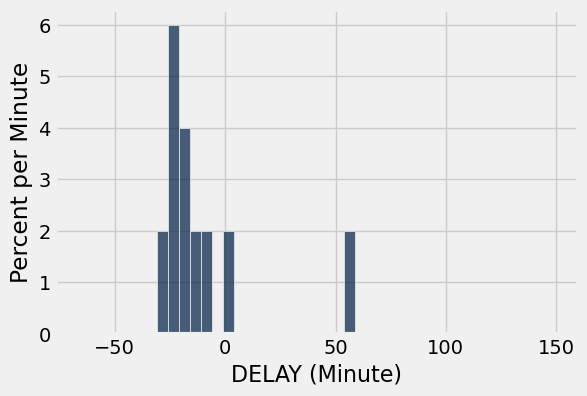

In [ ]:
sfo_delays.sample(10).hist('DELAY', bins = bins, unit='Minute')

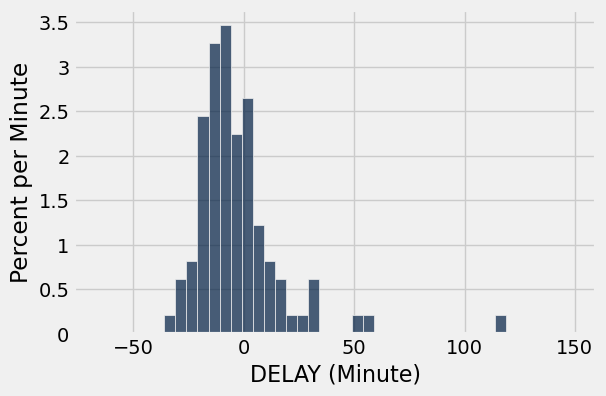

In [ ]:
sfo_delays.sample(100).hist('DELAY', bins = bins, unit='Minute')

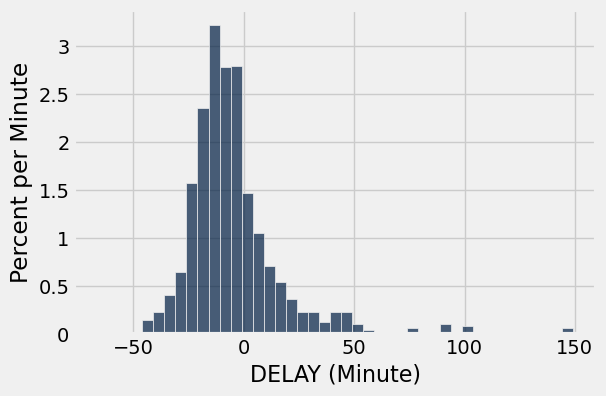

In [ ]:
sfo_delays.sample(1000).hist('DELAY', bins = bins, unit='Minute')

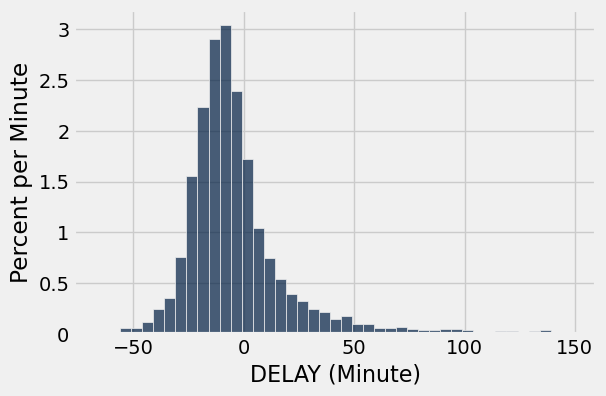

In [ ]:
sfo_delays.sample(10000).hist('DELAY', bins = bins, unit='Minute')

---

## A Statistic

---

### Inference

* Statistical Inference: Making conclusions based on data in random samples
* Example: Use the data to guess the value of an unknown and fixed number by creating an estimate of the unknown quantity that depends on the random sample.



---

### Terminology

* Parameter: A number associated with the population
* Statistic: A number calculated from the sample
* A statistic can be used as an estimate of a parameter

---

### Demo: Simulating Statistics

Recall the median for the flight delays (parameter) and compare it to the median statistic associated with a random sample of 10 flights.

In [ ]:
median_delay

-9.0

In [ ]:
np.median(sfo_delays.sample(10).column("DELAY"))

-14.5

---

Define a function that randomly samples delay data for an inputted sample size and returns the median delay for that sample.

In [ ]:
def sample_median(size):
    return np.median(sfo_delays.sample(10).column("DELAY"))

In [ ]:
sample_median(10)

-13.0

In [ ]:
sample_median(1000)

-11.5

---

Simulate randomly sampling 10 flights 1000 times and storing the sample delay medians for each iteration. Add the results to a table and visualize the sampling distribution.

In [ ]:
sample_medians = ...
reps = ...
sample_size = ...

for ...:
    new_median = ...
    sample_medians = ...

In [ ]:
Table().with_column('Sample Medians', sample_medians).hist(bins = np.arange(-30,20), unit='Minute')

---

Repeat the sample simulation except use a sample size of 1000, instead of 10.

In [ ]:
sample_medians = ...
reps = ...
sample_size = ...

for ...:
    new_median = ...
    sample_medians = ...

In [ ]:
Table().with_column('Sample Medians', sample_medians).hist(bins = np.arange(-30,20), unit='Minute')

---

### Probability Distribution of a Statistic

* Values of a statistic vary because random samples vary
* Sampling distribution (or probability distribution) of the statistic:
    * All possible values of the statistic,
    * and all the corresponding probabilities
    * Can be hard to calculate
        * Either have to do the math
        * Or have to generate all possible samples and calculate the statistic based on each sample


---

### Empirical Distribution of a Statistic

* Empirical distribution of the statistic:
    * Based on simulated values of the statistic
    * Consists of all the observed values of the statistic,
    * and the proportion of times each value appeared
* Good approximation to the probability distribution of the statistic if the number of repetitions in the simulation is large


---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>